# Nifty 50 stock data analysis
#### Time to look deep into the Nifty50 index to see what the stocks are up to

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [120]:
nifty_50_data = pd.read_csv('NSE_India.csv')
nifty_50_data.head()

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
0,ADANIPORTS,743.00,747.00,735.70,736.60,738.00,1.40,0.19,2824874,"2,092,610,161.72",901.00,489.50,46.19,-0.12
1,ASIANPAINT,"3,434.00","3,454.00","3,415.05","3,422.40","3,443.50",21.10,0.62,437673,"1,502,181,270.60","3,505.00","2,260.00",23.31,10.03
2,AXISBANK,701.00,709.80,700.05,696.35,704.35,8.00,1.15,6194227,"4,370,212,975.31",866.90,616.00,11.63,3.47
3,BAJAJ-AUTO,"3,284.00","3,316.00","3,270.65","3,277.10","3,309.35",32.25,0.98,150189,"495,900,047.76","4,361.40","3,027.05",-5.86,-0.33
4,BAJAJFINSV,"17,099.00","17,184.55","16,852.10","16,981.30","17,082.15",100.85,0.59,151077,"2,576,352,339.48","19,325.00","8,273.70",91.44,-2.90


## Clean the data
We'll convert the data to approrpite formats.

### Let's look at the types of Data to see if they need conversions to right formats

In [121]:
nifty_50_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SYMBOL        50 non-null     object 
 1   OPEN          50 non-null     object 
 2   HIGH          50 non-null     object 
 3   LOW           50 non-null     object 
 4   PREV. CLOSE   50 non-null     object 
 5   LTP           50 non-null     object 
 6   CHNG          50 non-null     float64
 7   %CHNG         50 non-null     float64
 8   VOLUME        50 non-null     int64  
 9   VALUE         50 non-null     object 
 10  52W H         50 non-null     object 
 11  52W L         50 non-null     object 
 12  365 D % CHNG  50 non-null     float64
 13  30 D % CHNG   50 non-null     float64
dtypes: float64(4), int64(1), object(9)
memory usage: 5.6+ KB


### Since, the price columns [OPEN, HIGH, LOW, PREV. CLOSE, LTP, VALUE, 52W H, 52W L] are of object type, we need them to be converted to 'float' to carry out some Exploratory analysis and plot them on graphs.

In [122]:
columns = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'VALUE', '52W H', '52W L']
for column_name in columns:
    nifty_50_data[column_name]=pd.to_numeric(nifty_50_data[column_name].str.split(',').str.join(''), errors='coerce').astype('float')
nifty_50_data['VOLUME']=nifty_50_data['VOLUME'].astype('float')

### As we can see, the numbers in the 'VALUE' and 'VOLUME' fields look larger and not human readable.
### Let us convert VALUE to be represented in Crores and VOLUME to be represented in Lakhs

In [123]:
nifty_50_data['VOLUME'] = round(nifty_50_data['VOLUME']/100000, 2)
nifty_50_data['VALUE'] = round(nifty_50_data['VALUE']/10000000, 2)

In [124]:
nifty_50_data.head()

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
0,ADANIPORTS,743.0,747.00,735.70,736.60,738.00,1.40,0.19,28.25,209.26,901.0,489.50,46.19,-0.12
1,ASIANPAINT,3434.0,3454.00,3415.05,3422.40,3443.50,21.10,0.62,4.38,150.22,3505.0,2260.00,23.31,10.03
2,AXISBANK,701.0,709.80,700.05,696.35,704.35,8.00,1.15,61.94,437.02,866.9,616.00,11.63,3.47
3,BAJAJ-AUTO,3284.0,3316.00,3270.65,3277.10,3309.35,32.25,0.98,1.50,49.59,4361.4,3027.05,-5.86,-0.33
4,BAJAJFINSV,17099.0,17184.55,16852.10,16981.30,17082.15,100.85,0.59,1.51,257.64,19325.0,8273.70,91.44,-2.90


## Let us look into some of the questions that we will answer with the data


### 1. TOP 5 high volume stocks

This will give us the top 5 stocks of Nifty50 that are being traded in high volume

In [125]:
nifty_50_data.sort_values(by='VOLUME', ascending=False).head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
33,NTPC,127.0,131.90,126.75,126.00,130.90,4.90,3.89,177.30,230.71,152.10,88.15,27.21,-0.79
42,TATAMOTORS,496.8,499.00,487.10,497.60,488.25,-9.35,-1.88,152.42,749.01,536.70,185.05,166.81,3.65
38,SBIN,472.5,483.30,471.05,470.80,482.25,11.45,2.43,145.53,696.72,542.30,269.50,68.50,-0.50
34,ONGC,143.1,148.60,143.10,143.05,146.95,3.90,2.73,107.89,158.66,172.75,87.75,53.49,-1.95
10,COALINDIA,156.0,156.65,153.05,155.30,153.15,-2.15,-1.38,96.53,149.41,203.80,123.40,14.74,-2.79


### INFERENCE
#### NTPC is the stock with highest trading volume of ~177L. This is followed by Tata Motors, State Bank of India, ONGC and COAL INDIA.
#### 3 out of the top 5 stocks belongs (closely related) to the Energy domain

### 2. TOP 5 high turnover stocks

This will give us the top 5 stocks of Nifty50 that are being traded in high value

In [126]:
nifty_50_data.sort_values(by='VALUE', ascending=False).head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
42,TATAMOTORS,496.80,499.0,487.10,497.60,488.25,-9.35,-1.88,152.42,749.01,536.70,185.05,166.81,3.65
38,SBIN,472.50,483.3,471.05,470.80,482.25,11.45,2.43,145.53,696.72,542.30,269.50,68.50,-0.50
36,RELIANCE,2415.90,2436.0,2404.00,2403.85,2435.20,31.35,1.30,23.96,581.22,2751.35,1830.00,20.95,-0.18
22,ICICIBANK,767.95,778.0,763.60,764.70,772.80,8.10,1.06,73.83,570.46,867.00,512.00,44.97,6.76
44,TCS,3831.10,3872.2,3811.70,3817.75,3869.70,51.95,1.36,12.86,494.01,3989.90,2880.00,30.38,4.87


### INFERENCE
#### Tata Motors is the stock with highest traded value of ~749C. This is followed by State Bank of India, Reliance, ICICI Bank and TCS
#### 2 out of the top 5 stocks belongs to the Tata group of companies.

### 3. TOP 5 high return stocks in the past year

This will give us the top 5 stocks of Nifty50 that gave higher returns in last YTD

In [127]:
nifty_50_data.sort_values(by='365 D % CHNG', ascending=False).head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
42,TATAMOTORS,496.80,499.00,487.10,497.60,488.25,-9.35,-1.88,152.42,749.01,536.70,185.05,166.81,3.65
20,HINDALCO,479.00,481.50,473.85,478.05,475.20,-2.85,-0.60,24.78,118.21,551.85,224.55,100.57,12.58
4,BAJAJFINSV,17099.00,17184.55,16852.10,16981.30,17082.15,100.85,0.59,1.51,257.64,19325.00,8273.70,91.44,-2.90
49,WIPRO,722.75,722.75,711.55,718.70,718.85,0.15,0.02,23.62,169.00,739.85,387.80,85.18,12.17
45,TECHM,1793.00,1799.95,1767.00,1784.80,1796.15,11.35,0.64,13.58,241.81,1838.00,915.00,82.50,12.02


### INFERENCE
#### Tata Motors is also the stock with highest returns in the past YTD. It is now up by 166.8%.
#### 2 out of the top 5 stocks are companies belonging to the IT sector. (WIPRO and TECHM)

### 4. TOP 5 high return stocks in the past month

This will give us the top 5 stocks of Nifty50 that gave higher returns in last month to date

In [128]:
nifty_50_data.sort_values(by='30 D % CHNG', ascending=False).head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
15,HCLTECH,1329.50,1333.90,1307.25,1326.15,1330.85,4.70,0.35,18.11,238.75,1377.75,891.00,39.52,13.21
40,SUNPHARMA,852.50,854.00,838.50,848.95,841.25,-7.70,-0.91,12.01,101.41,860.05,550.40,42.38,12.92
20,HINDALCO,479.00,481.50,473.85,478.05,475.20,-2.85,-0.60,24.78,118.21,551.85,224.55,100.57,12.58
49,WIPRO,722.75,722.75,711.55,718.70,718.85,0.15,0.02,23.62,169.00,739.85,387.80,85.18,12.17
45,TECHM,1793.00,1799.95,1767.00,1784.80,1796.15,11.35,0.64,13.58,241.81,1838.00,915.00,82.50,12.02


### INFERENCE
#### HCL Technologies is the stock with highest returns in the past month. It is now up by 13.2% since last month.
#### 3 out of the top 5 stocks are companies belonging to the IT sector. (HCLTECH, WIPRO and TECHM)

### 5. TOP 5 low return stocks in the past year

This will give us the top 5 stocks of Nifty50 that gave lower returns in last YTD

In [130]:
nifty_50_data.sort_values(by='365 D % CHNG').head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
19,HEROMOTOCO,2492.0,2496.6,2468.40,2476.60,2486.25,9.65,0.39,1.01,25.04,3629.05,2310.00,-20.18,0.57
28,KOTAKBANK,1830.0,1852.9,1815.30,1824.45,1842.35,17.90,0.98,15.70,289.11,2253.00,1626.00,-8.51,-4.69
12,DRREDDY,4861.0,4892.9,4828.05,4853.15,4850.00,-3.15,-0.06,1.53,74.06,5614.60,4135.00,-7.41,5.58
3,BAJAJ-AUTO,3284.0,3316.0,3270.65,3277.10,3309.35,32.25,0.98,1.50,49.59,4361.40,3027.05,-5.86,-0.33
18,HDFCLIFE,652.4,655.0,649.05,650.50,651.30,0.80,0.12,15.38,100.23,775.65,627.00,-4.11,-5.85


### INFERENCE
#### Hero Motocorp is the stock with lowest returns in the past YTD. It is now down by 20.18%.
#### 2 out of the top 5 stocks are companies belonging to the Automobile sector. (HEROMOTOCO and BAJAJ-AUTO). 

### 6. TOP 5 low return stocks in the past month

This will give us the top 5 stocks of Nifty50 that gave lower returns in last month to date

In [131]:
nifty_50_data.sort_values(by='30 D % CHNG').head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG
25,IOC,113.7,114.90,113.25,112.95,113.80,0.85,0.75,34.15,38.94,141.50,86.75,23.44,-7.57
18,HDFCLIFE,652.4,655.00,649.05,650.50,651.30,0.80,0.12,15.38,100.23,775.65,627.00,-4.11,-5.85
16,HDFC,2645.0,2669.80,2620.35,2636.40,2654.65,18.25,0.69,10.69,282.75,3021.10,2354.00,2.63,-4.88
28,KOTAKBANK,1830.0,1852.90,1815.30,1824.45,1842.35,17.90,0.98,15.70,289.11,2253.00,1626.00,-8.51,-4.69
23,INDUSINDBK,915.0,917.95,903.00,912.30,906.95,-5.35,-0.59,23.35,212.51,1242.00,789.00,1.35,-4.08


### INFERENCE
#### Indian Oil Corporation is the stock with lowest returns in the past month. It is now down by 7.5% since past month.
#### 2 out of the top 5 stocks are companies belonging to the Banking sector. (KOTAKBANK and INDUSINDBK). 

### 7. TOP 5 stocks near their 52 week High point

In [132]:
nifty_50_data['52W H CLOSENESS %'] = round(((nifty_50_data['52W H']-nifty_50_data['LTP'])/nifty_50_data['LTP'])*100, 2)
nifty_50_data.sort_values(by='52W H CLOSENESS %').head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG,52W H CLOSENESS %
24,INFY,1898.45,1900.00,1878.00,1898.45,1887.35,-11.10,-0.58,20.48,385.97,1914.05,1231.0,50.62,9.39,1.41
1,ASIANPAINT,3434.00,3454.00,3415.05,3422.40,3443.50,21.10,0.62,4.38,150.22,3505.00,2260.0,23.31,10.03,1.79
40,SUNPHARMA,852.50,854.00,838.50,848.95,841.25,-7.70,-0.91,12.01,101.41,860.05,550.4,42.38,12.92,2.23
45,TECHM,1793.00,1799.95,1767.00,1784.80,1796.15,11.35,0.64,13.58,241.81,1838.00,915.0,82.50,12.02,2.33
49,WIPRO,722.75,722.75,711.55,718.70,718.85,0.15,0.02,23.62,169.00,739.85,387.8,85.18,12.17,2.92


### INFERENCE
#### Infosys, Asian Paint, Sun Pharma, Tech Mahindra and Wipro are the stocks nearing their previous 52 week high point. They are less than 3% away from milestone.
#### 3 out of the top 5 stocks are companies belonging to the IT sector. (INFY, TECHM and WIPRO).
#### Things are looking bright for IT sector stocks.

### 8. TOP 5 stocks near their 52 week Low point

In [133]:
nifty_50_data['52W L CLOSENESS %'] = round(((nifty_50_data['LTP']-nifty_50_data['52W L'])/nifty_50_data['LTP'])*100, 2)
nifty_50_data.sort_values(by='52W L CLOSENESS %').head(5)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG,52W H CLOSENESS %,52W L CLOSENESS %
18,HDFCLIFE,652.4,655.00,649.05,650.50,651.30,0.80,0.12,15.38,100.23,775.65,627.00,-4.11,-5.85,19.09,3.73
19,HEROMOTOCO,2492.0,2496.60,2468.40,2476.60,2486.25,9.65,0.39,1.01,25.04,3629.05,2310.00,-20.18,0.57,45.96,7.09
7,BPCL,388.0,393.75,385.60,386.10,386.30,0.20,0.05,41.50,161.50,503.00,357.40,1.09,0.05,30.21,7.48
8,BRITANNIA,3623.0,3643.60,3610.00,3617.55,3625.20,7.65,0.21,2.53,91.64,4153.00,3317.30,1.39,1.80,14.56,8.49
3,BAJAJ-AUTO,3284.0,3316.00,3270.65,3277.10,3309.35,32.25,0.98,1.50,49.59,4361.40,3027.05,-5.86,-0.33,31.79,8.53


### INFERENCE
#### HDFC Life, Hero Motocorp, BPCL, Britannia and Bajaj auto are the stocks nearing their previous 52 week low point. They are less than 9% away from milestone.
#### 2 out of the top 5 stocks are companies belonging to the Automonile sector. (HEROMOTOCO and BAJAJ-AUTO).
#### Things are looking weak for Automobile sector stocks due to Covid situations.

### 9. TOP 5 Stocks that have a positive monthly gain despite a low yearly return

In [134]:
selective_return = nifty_50_data[(nifty_50_data['365 D % CHNG'] < 10) & (nifty_50_data['30 D % CHNG'] > 3)]
selective_return.sort_values(by='30 D % CHNG', ascending=False)

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG,30 D % CHNG,52W H CLOSENESS %,52W L CLOSENESS %
13,EICHERMOT,2715.0,2724.9,2691.15,2718.80,2699.90,-18.90,-0.70,4.44,120.38,3037.0,2303.7,6.93,10.72,12.49,14.67
12,DRREDDY,4861.0,4892.9,4828.05,4853.15,4850.00,-3.15,-0.06,1.53,74.06,5614.6,4135.0,-7.41,5.58,15.76,14.74
31,MARUTI,7600.0,7649.0,7520.00,7523.90,7622.75,98.85,1.31,3.00,227.43,8368.0,6400.0,-2.18,4.37,9.78,16.04


### INFERENCE
#### Eicher Motors, Dr.Reddy and Maruthi are the stocks that are doing exceptionally well in the past month despite low returns in the past year. 
#### These stocks needs to be further analysed fundamentally to see what is contributing to their positive price movement in the past month

## Visualizations

### Let us look at how Last Traded Price (LTP) is distributed

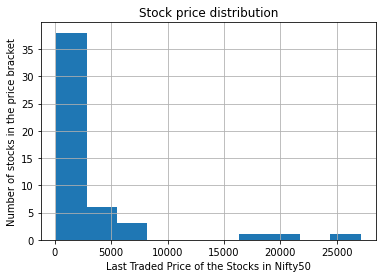

In [135]:
plt.hist(nifty_50_data['LTP'], bins=10)
plt.title('Stock price distribution')
plt.xlabel('Last Traded Price of the Stocks in Nifty50')
plt.ylabel('Number of stocks in the price bracket')
plt.grid()

#### This shows that 76% of the Stocks in Nifty50 are priced within Rs.2500.
#### This should encourage younger generation to invest.